In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

In [2]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


# Orkney

In [3]:
# read into dataframe
orkney = pd.read_csv('orkney_grp.csv', index_col=0)
print(len(orkney))

# drop rows for which environment production cannot be calculated
#orkney.dropna(subset=['RS_1', 'BS_1', 'RS_2', 'BS_2', 'RS_3', 'BS_3', 'RS_4', 'BS_4', 'a_count'], inplace=True)
#print(len(orkney))

672


In [4]:
# relevant columns
ocolumns = ['GameID', 'Treatments', 'order', 'Rounds', 'subsidy', 'a_count', 'RS_1', 'BS_1', 'RS_2', 'BS_2', 'RS_3', 'BS_3', 'RS_4', 'BS_4',
 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4', 
 'RSP_type_1', 'RSP_type_2', 'RSP_type_3', 'RSP_type_4', 'Years_farming_1', 'Years_farming_2', 'Years_farming_3', 'Years_farming_4',
 'Primary_income_1', 'Primary_income_2', 'Primary_income_3', 'Primary_income_4', 'Secondary_income_1', 'Secondary_income_2', 'Secondary_income_3', 'Secondary_income_4',
 'Total_farm_size_1', 'Total_farm_size_2', 'Total_farm_size_3', 'Total_farm_size_4',
 'Livestock_Sheep_1', 'Livestock_Sheep_2', 'Livestock_Sheep_3', 'Livestock_Sheep_4', 'Livestock_cattle_1', 'Livestock_cattle_2', 'Livestock_cattle_3', 'Livestock_cattle_4','How_many_other_livestock_1', 'How_many_other_livestock_2', 'How_many_other_livestock_3', 'How_many_other_livestock_4', 'What_other_livestock_1', 'What_other_livestock_2', 'What_other_livestock_3', 'What_other_livestock_4',
 'Neg_Wellb_1', 'Neg_Wellb_2', 'Neg_Wellb_3', 'Neg_Wellb_4', 'Pos_Wellb_1', 'Pos_Wellb_2', 'Pos_Wellb_3', 'Pos_Wellb_4',
 'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Government_Responsibility_1', 'Government_Responsibility_2', 'Government_Responsibility_3', 'Government_Responsibility_4', 'Coordination_scaring_1', 'Coordination_scaring_2', 'Coordination_scaring_3', 'Coordination_scaring_4',
 'Risk_fine_1', 'Risk_fine_2', 'Risk_fine_3', 'Risk_fine_4', 'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4',
 'Trust_NFU_1', 'Trust_NFU_2', 'Trust_NFU_3', 'Trust_NFU_4', 'Trust_RSPB_1', 'Trust_RSPB_2', 'Trust_RSPB_3', 'Trust_RSPB_4', 'Trust_SGRPID_1', 'Trust_SGRPID_2', 'Trust_SGRPID_3', 'Trust_SGRPID_4', 'Trust_SNH_1', 'Trust_SNH_2', 'Trust_SNH_3', 'Trust_SNH_4',
 'Trust_community1_1', 'Trust_community1_2', 'Trust_community1_3', 'Trust_community1_4', 'Trust_community2_1', 'Trust_community2_2', 'Trust_community2_3', 'Trust_community2_4', 'Trust_community3_1', 'Trust_community3_2', 'Trust_community3_3', 'Trust_community3_4',
 'Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4', 'Rel2_1', 'Rel2_2', 'Rel2_3', 'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4',
 'Goal_games_1', 'Goal_games_2', 'Goal_games_3', 'Goal_games_4', 'Game_depend_on_others_1', 'Game_depend_on_others_2', 'Game_depend_on_others_3', 'Game_depend_on_others_4',
 'Game_effect_on_others_1', 'Game_effect_on_others_2', 'Game_effect_on_others_3', 'Game_effect_on_others_4', 'Game_next_gen_1', 'Game_next_gen_2', 'Game_next_gen_3', 'Game_next_gen_4']

In [5]:
# drop all irrelevant columns
orkney.drop(columns=set(orkney.columns) - set(ocolumns), inplace=True)

# calculate environmental production
orkney['envProduction'] = ((orkney['RS_1'] - orkney['BS_1']) + (orkney['RS_2'] - orkney['BS_2']) + \
                           (orkney['RS_3'] - orkney['BS_3']) + (orkney['RS_4'] - orkney['BS_4'])) * orkney['a_count']
orkney['env'] = ((orkney['RS_1'] - orkney['BS_1']) + (orkney['RS_2'] - orkney['BS_2']) + \
                           (orkney['RS_3'] - orkney['BS_3']) + (orkney['RS_4'] - orkney['BS_4']))
orkney['production'] = orkney['a_count']

# Since How_many_other_livestock_x and What_other_livestock_x have all values NaN, we remove them.
orkney.drop(columns=['How_many_other_livestock_1', 'How_many_other_livestock_2', 'How_many_other_livestock_3', 'How_many_other_livestock_4', 'What_other_livestock_1', 'What_other_livestock_2', 'What_other_livestock_3', 'What_other_livestock_4'], inplace=True)

# Add country attribute
orkney['country'] = 'orkney'

# Gabon

In [6]:
# read into dataframe
gabon = pd.read_csv('gabon_grp.csv', index_col=0)
print(len(gabon))

# drop rows for which environment production cannot be calculated
#gabon.dropna(subset=['RoS_1', 'BoS_1', 'RoS_2', 'BoS_2', 'RoS_3', 'BoS_3', 'RoS_4', 'BoS_4', 'a_count'], inplace=True)
#print(len(gabon))

2080


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (354,355) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# relevant columns
gcolumns = ['GameID', 'Treatments', 'Game_order', 'Rounds', 'Cul', 'Sub', 'a_count', 'RoS_1', 'BoS_1', 'RoS_2', 'BoS_2', 'RoS_3', 'BoS_3', 'RoS_4', 'BoS_4',
 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4', 
 'Resp_HH_head_1', 'Resp_HH_head_2', 'Resp_HH_head_3', 'Resp_HH_head_4', 'Years_Res_1', 'Years_Res_2', 'Years_Res_3', 'Years_Res_4', 'Years_Farm_1', 'Years_Farm_2', 'Years_Farm_3', 'Years_Farm_4',
 'HH_OCC1_1', 'HH_OCC1_2', 'HH_OCC1_3', 'HH_OCC1_4', 'HH_OCC2_1', 'HH_OCC2_2', 'HH_OCC2_3', 'HH_OCC2_4',
 'Small_field_1', 'Small_field_2', 'Small_field_3', 'Small_field_4', 'Big_field_1', 'Big_field_2', 'Big_field_3', 'Big_field_4', 'Med_field_1', 'Med_field_2', 'Med_field_3', 'Med_field_4',
 'Livestock_1', 'Livestock_2', 'Livestock_3', 'Livestock_4',
 'Neg_Wellb_1', 'Neg_Wellb_2', 'Neg_Wellb_3', 'Neg_Wellb_4', 'Pos_Wellb_1', 'Pos_Wellb_2', 'Pos_Wellb_3', 'Pos_Wellb_4',
 'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'ANPN_resp_1', 'ANPN_resp_2', 'ANPN_resp_3', 'ANPN_resp_4','Com_Coop_1', 'Com_Coop_2', 'Com_Coop_3', 'Com_Coop_4',
 'Prison_1', 'Prison_2', 'Prison_3', 'Prison_4', 'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4',
 'Min_Eaux_et_Forets_1', 'Min_Eaux_et_Forets_2', 'Min_Eaux_et_Forets_3', 'Min_Eaux_et_Forets_4', 'Min_Agriculture_1', 'Min_Agriculture_2', 'Min_Agriculture_3', 'Min_Agriculture_4', 'ANPN_1', 'ANPN_2', 'ANPN_3', 'ANPN_4',
 'Community_Trust1_1', 'Community_Trust1_2', 'Community_Trust1_3', 'Community_Trust1_4', 'Community_Trust2_1', 'Community_Trust2_2', 'Community_Trust2_3', 'Community_Trust2_4', 'Community_Trust3_1', 'Community_Trust3_2', 'Community_Trust3_3', 'Community_Trust3_4',
 'Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4', 'Rel2_1', 'Rel2_2', 'Rel2_3', 'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4',
 'Games_Obj_1', 'Games_Obj_2', 'Games_Obj_3', 'Games_Obj_4', 'Games_Depend_Others_1', 'Games_Depend_Others_2', 'Games_Depend_Others_3', 'Games_Depend_Others_4',
 'Games_Effects_Others_1', 'Games_Effects_Others_2', 'Games_Effects_Others_3', 'Games_Effects_Others_4', 'Games_Fut_gen_1', 'Games_Fut_gen_2', 'Games_Fut_gen_3', 'Games_Fut_gen_4']

In [8]:
# drop all irrelevant columns
gabon.drop(columns=set(gabon.columns) - set(gcolumns), inplace=True)

# calculate environmental production
gabon['envProduction'] = ((gabon['RoS_1'] - gabon['BoS_1']) + (gabon['RoS_2'] - gabon['BoS_2']) + \
                           (gabon['RoS_3'] - gabon['BoS_3']) + (gabon['RoS_4'] - gabon['BoS_4'])) * gabon['a_count']
gabon['env'] = gabon['a_count']
gabon['production'] = ((gabon['RoS_1'] - gabon['BoS_1']) + (gabon['RoS_2'] - gabon['BoS_2']) + \
                           (gabon['RoS_3'] - gabon['BoS_3']) + (gabon['RoS_4'] - gabon['BoS_4']))

# Add country attribute
gabon['country'] = 'gabon'

# Tanzania

In [9]:
# read into dataframe
tanzania = pd.read_csv('tanzania_grp.csv', index_col=0)
print(len(tanzania))

# drop rows for which environment production cannot be calculated
#tanzania.dropna(subset=['RS_1', 'BS_1', 'RS_2', 'BS_2', 'RS_3', 'BS_3', 'RS_4', 'BS_4', 'l_count'], inplace=True)
#print(len(tanzania))

1376


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (85,260,435,610) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# relevant columns
tcolumns = ['GameID', 'Treatments', 'order', 'Rounds', 'culled', 'subsidy', 'l_count', 'RS_1', 'BS_1', 'RS_2', 'BS_2', 'RS_3', 'BS_3', 'RS_4', 'BS_4',
 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4', 
 'Head_of_household_1', 'Head_of_household_2', 'Head_of_household_3', 'Head_of_household_4', 'years_at_household_1', 'years_at_household_2', 'years_at_household_3', 'years_at_household_4',
 'Primary_income_1', 'Primary_income_2', 'Primary_income_3', 'Primary_income_4', 'Secondary_income_1', 'Secondary_income_2', 'Secondary_income_3', 'Secondary_income_4', 'Tourism_income_1', 'Tourism_income_2', 'Tourism_income_3', 'Tourism_income_4',
 'Land_1', 'Land_2', 'Land_3', 'Land_4',
 'No_other_1', 'No_other_2', 'No_other_3', 'No_other_4', 'No_shoats_1', 'No_shoats_2', 'No_shoats_3', 'No_shoats_4', 'No_cattle_1', 'No_cattle_2', 'No_cattle_3', 'No_cattle_4', 'No_dogs_1', 'No_dogs_2', 'No_dogs_3', 'No_dogs_4',
 'Lions_harm_1', 'Lions_harm_2', 'Lions_harm_3', 'Lions_harm_4', 'Lions_benefit_1', 'Lions_benefit_2', 'Lions_benefit_3', 'Lions_benefit_4',
 'Conservation_futuregen_1', 'Conservation_futuregen_2', 'Conservation_futuregen_3', 'Conservation_futuregen_4',
 'Government_compensate_1', 'Government_compensate_2', 'Government_compensate_3', 'Government_compensate_4', 'Coordinate_scaring_1', 'Coordinate_scaring_2', 'Coordinate_scaring_3', 'Coordinate_scaring_4',
 'Prevent_punished_1', 'Prevent_punished_2', 'Prevent_punished_3', 'Prevent_punished_4', 'Prevent_social_1', 'Prevent_social_2', 'Prevent_social_3', 'Prevent_social_4',
 'Trust_NGOs_1', 'Trust_NGOs_2', 'Trust_NGOs_3', 'Trust_NGOs_4', 'Trust_TANAPA_1', 'Trust_TANAPA_2', 'Trust_TANAPA_3', 'Trust_TANAPA_4', 'Trust_Tanzanian_government_1', 'Trust_Tanzanian_government_2', 'Trust_Tanzanian_government_3', 'Trust_Tanzanian_government_4',
 'Community_help_1', 'Community_help_2', 'Community_help_3', 'Community_help_4', 'Community_honest_1', 'Community_honest_2', 'Community_honest_3', 'Community_honest_4', 'More_trustworthy_1', 'More_trustworthy_2', 'More_trustworthy_3', 'More_trustworthy_4', 'Borrow_money_1', 'Borrow_money_2', 'Borrow_money_3', 'Borrow_money_4', 'Lend_money_1', 'Lend_money_2', 'Lend_money_3', 'Lend_money_4',
 'Familiarity_1_1', 'Familiarity_1_2', 'Familiarity_1_3', 'Familiarity_1_4', 'Familiarity_2_1', 'Familiarity_2_2', 'Familiarity_2_3', 'Familiarity_2_4', 'Familiarity_3_1', 'Familiarity_3_2', 'Familiarity_3_3', 'Familiarity_3_4',
 'Game_obj_1', 'Game_obj_2', 'Game_obj_3', 'Game_obj_4', 'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
 'Effect_on_others_1', 'Effect_on_others_2', 'Effect_on_others_3', 'Effect_on_others_4', 'Effect_on_future_1', 'Effect_on_future_2', 'Effect_on_future_3', 'Effect_on_future_4']

In [11]:
# drop all irrelevant columns
tanzania.drop(columns=set(tanzania.columns) - set(tcolumns), inplace=True)

# calculate environmental production
tanzania['envProduction'] = ((tanzania['RS_1'] - tanzania['BS_1']) + (tanzania['RS_2'] - tanzania['BS_2']) + \
                           (tanzania['RS_3'] - tanzania['BS_3']) + (tanzania['RS_4'] - tanzania['BS_4'])) * tanzania['l_count']
tanzania['env'] = tanzania['l_count']
tanzania['production'] = ((tanzania['RS_1'] - tanzania['BS_1']) + (tanzania['RS_2'] - tanzania['BS_2']) + \
                           (tanzania['RS_3'] - tanzania['BS_3']) + (tanzania['RS_4'] - tanzania['BS_4']))

# Add country attribute
tanzania['country'] = 'tanzania'

# Madagascar-Kenya

In [12]:
# read into dataframe
madken = pd.read_csv('madken_grp.csv', index_col=0)
print(len(madken))

# drop rows for which environment production cannot be calculated
#madken.dropna(subset=['RouS_1', 'BonS_1', 'RouS_2', 'BonS_2', 'RouS_3', 'BonS_3', 'RouS_4', 'BonS_4', 'Bump_1', 'Bump_2', 'Bump_3', 'Bump_4'], inplace=True)
#print(len(madken))

# rename columns as required
madken.rename(columns = {"Country": "country", "rimary_income_1": "Primary_income_1", "rimary_income_2": "Primary_income_2", "rimary_income_3": "Primary_income_3", "rimary_income_4": "Primary_income_4"}, inplace = True) 

5115


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,16,18,20,105,232,233,241,243,330,454,463,465,552,676,685,774) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# count fallows
for suffix in ['_1', '_2', '_3', '_4']:
    basecols = ['CC0'+str(x)+suffix for x in range(1,10)]+['CC'+str(x)+suffix for x in range(10,37)]
    madken['fallows'+suffix] = 36 - (madken[basecols]).sum(axis=1, skipna=True, min_count=1)

In [14]:
# relevant columns
mcolumns = ['GAMEID', 'Treatments', 'Subs', 'Rounds', 'country', 'fallows_1', 'fallows_2', 'fallows_3', 'fallows_4', 'RouS_1', 'BonS_1', 'RouS_2', 'BonS_2', 'RouS_3', 'BonS_3', 'RouS_4', 'BonS_4',
 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4', 
 'HH_head_1', 'HH_head_2', 'HH_head_3', 'HH_head_4', 'Residency_years_1', 'Residency_years_2', 'Residency_years_3', 'Residency_years_4',
 'Primary_income_1', 'Primary_income_2', 'Primary_income_3', 'Primary_income_4', 'Secondary_income_1', 'Secondary_income_2', 'Secondary_income_3', 'Secondary_income_4',
 'Paddy_field_acres_1', 'Paddy_field_acres_2', 'Paddy_field_acres_3', 'Paddy_field_acres_4', 'Sum_tavy_acres_1', 'Sum_tavy_acres_2', 'Sum_tavy_acres_3', 'Sum_tavy_acres_4', 'Perennial_acres_1', 'Perennial_acres_2', 'Perennial_acres_3', 'Perennial_acres_4',
 'Bees_1', 'Bees_2',
 'Bees_3', 'Bees_4', 'Cattle_1', 'Cattle_2', 'Cattle_3', 'Cattle_4', 'Fish_1', 'Fish_2', 'Fish_3', 'Fish_4','Goats_1', 'Goats_2', 'Goats_3', 'Goats_4', 'Goose_1', 'Goose_2', 'Goose_3', 'Goose_4', 'Pork_1', 'Pork_2', 'Pork_3', 'Pork_4', 'Poultry_1', 'Poultry_2', 'Poultry_3', 'Poultry_4', 'Rabbit_1', 'Rabbit_2', 'Rabbit_3', 'Rabbit_4', 'Sheep_1', 'Sheep_2', 'Sheep_3', 'Sheep_4',
 'Neg_wellb_1', 'Neg_wellb_2', 'Neg_wellb_3', 'Neg_wellb_4', 'Pos_wellb_1', 'Pos_wellb_2', 'Pos_wellb_3', 'Pos_wellb_4',
 'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4',
 'Gov_resp_1', 'Gov_resp_2', 'Gov_resp_3', 'Gov_resp_4', 'Com_coord_1', 'Com_coord_2', 'Com_coord_3', 'Com_coord_4',
 'Risks_fines_1', 'Risks_fines_2', 'Risks_fines_3', 'Risks_fines_4', 'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4',
 'Trust_COBA_CFA_1', 'Trust_COBA_CFA_2', 'Trust_COBA_CFA_3', 'Trust_COBA_CFA_4', 'Trust_MEF_1', 'Trust_MEF_2', 'Trust_MEF_3', 'Trust_MEF_4', 'Trust_MV_KFS_1', 'Trust_MV_KFS_2', 'Trust_MV_KFS_3', 'Trust_MV_KFS_4', 'Trust_MoA_1', 'Trust_MoA_2', 'Trust_MoA_3', 'Trust_MoA_4',
 'Com_trust1_1', 'Com_trust1_2', 'Com_trust1_3', 'Com_trust1_4', 'Com_trust2_1', 'Com_trust2_2', 'Com_trust2_3', 'Com_trust2_4', 'Com_trust3_1', 'Com_trust3_2', 'Com_trust3_3', 'Com_trust3_4', 'Com_trust4_1', 'Com_trust4_2', 'Com_trust4_3', 'Com_trust4_4',
 'familiarity.familiarity_001_1', 'familiarity.familiarity_001_2', 'familiarity.familiarity_001_3', 'familiarity.familiarity_001_4', 'familiarity.familiarity_002_1', 'familiarity.familiarity_002_2', 'familiarity.familiarity_002_3', 'familiarity.familiarity_002_4', 'familiarity.familiarity_003_1', 'familiarity.familiarity_003_2', 'familiarity.familiarity_003_3', 'familiarity.familiarity_003_4',
 'Goal_1', 'Goal_2', 'Goal_3', 'Goal_4', 'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
 'Effects_on_others_1', 'Effects_on_others_2', 'Effects_on_others_3', 'Effects_on_others_4', 'Effects_on_next_gen_1', 'Effects_on_next_gen_2', 'Effects_on_next_gen_3', 'Effects_on_next_gen_4',]

In [15]:
# drop all irrelevant columns
madken.drop(columns=set(madken.columns) - set(mcolumns), inplace=True)

# calculate environmental production
#madken['envProduction'] = (madken['RouS_1'] - madken['BonS_1']) * madken['Bump_1'] + (madken['RouS_2'] - madken['BonS_2']) * madken['Bump_2'] + \
#                           (madken['RouS_3'] - madken['BonS_3']) * madken['Bump_3'] + (madken['RouS_4'] - madken['BonS_4']) * madken['Bump_4']
#madken['envProduction'] = (madken['RouS_1'] - madken['BonS_1']) * madken['fallows_1'] + (madken['RouS_2'] - madken['BonS_2']) * madken['fallows_2'] + \
#                           (madken['RouS_3'] - madken['BonS_3']) * madken['fallows_3'] + (madken['RouS_4'] - madken['BonS_4']) * madken['fallows_4']
madken['env'] = madken['fallows_1'] + madken['fallows_2'] + madken['fallows_3'] + madken['fallows_4']
madken['production'] = (madken['RouS_1'] - madken['BonS_1']) + (madken['RouS_2'] - madken['BonS_2']) + (madken['RouS_3'] - madken['BonS_3']) + (madken['RouS_4'] - madken['BonS_4'])
madken['envProduction'] = madken['production'] * madken['env']

In [16]:
madken.rename(columns={'GAMEID':'GameID'}, inplace=True)

# Vietnam/ Cambodia

In [17]:
# read into dataframe
vietnam = pd.read_csv('Data Vietnam.csv', index_col=0)
# update country attribute
vietnam['country'] = 'vietnam'
print(len(vietnam))
relv = pd.read_csv('relationship_vietnam.csv')
relv.columns

4480


Index(['Game ID', 'Player 1', 'Player 2', 'Player 3', 'Player 4', 'P1_P2',
       'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4'],
      dtype='object')

In [18]:
plotlevel = pd.read_stata('plot_level_vietnam.dta')[['z1', 'c2']]
plotlevel.drop_duplicates(inplace=True)
vietnam['primary_farming_1'] = pd.merge(vietnam, plotlevel, left_on='Player1HHID', right_on='z1', how='left')['c2']
vietnam['primary_farming_2'] = pd.merge(vietnam, plotlevel, left_on='Player2HHID', right_on='z1', how='left')['c2']
vietnam['primary_farming_3'] = pd.merge(vietnam, plotlevel, left_on='Player3HHID', right_on='z1', how='left')['c2']
vietnam['primary_farming_4'] = pd.merge(vietnam, plotlevel, left_on='Player4HHID', right_on='z1', how='left')['c2']

In [19]:
"""a = np.unique(vietnam[['Player1HHID', 'Player2HHID', 'Player3HHID', 'Player4HHID']].drop_duplicates().values)
b = np.unique(pd.read_csv('relationship_vietnam.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values)
print(set(a) - set(b))
u, c = np.unique(pd.read_csv('relationship_vietnam.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values, return_counts=True)
print(u[c > 1])"""

"a = np.unique(vietnam[['Player1HHID', 'Player2HHID', 'Player3HHID', 'Player4HHID']].drop_duplicates().values)\nb = np.unique(pd.read_csv('relationship_vietnam.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values)\nprint(set(a) - set(b))\nu, c = np.unique(pd.read_csv('relationship_vietnam.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values, return_counts=True)\nprint(u[c > 1])"

In [20]:
vietnam = pd.merge(vietnam, relv[['Game ID', 'P1_P2', 'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4']], how='left', left_on='Session', right_on='Game ID')
vietnam['Rel1_1'] = vietnam['P1_P2']
vietnam['Rel2_1'] = vietnam['P1_P3']
vietnam['Rel3_1'] = vietnam['P1_P4']

vietnam['Rel1_2'] = vietnam['P1_P2']
vietnam['Rel2_2'] = vietnam['P2_P3']
vietnam['Rel3_2'] = vietnam['P2_P4']

vietnam['Rel1_3'] = vietnam['P1_P3']
vietnam['Rel2_3'] = vietnam['P2_P3']
vietnam['Rel3_3'] = vietnam['P3_P4']

vietnam['Rel1_4'] = vietnam['P1_P4']
vietnam['Rel2_4'] = vietnam['P2_P4']
vietnam['Rel3_4'] = vietnam['P3_P4']

vietnam.drop(columns=['P1_P2', 'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4'], inplace=True)
print(len(vietnam))

4480


In [21]:
# read into dataframe
cambodia = pd.read_csv('Data Cambodia.csv', index_col=0)
# update country attribute
cambodia['country'] = 'cambodia'
print(len(cambodia))
relc = pd.read_csv('relationship_cambodia.csv')
relc.columns

4095


Index(['Game ID', 'Player 1', 'Player 2', 'Player 3', 'Player 4', 'P1_P2',
       'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4'],
      dtype='object')

In [22]:
plotlevel = pd.read_stata('plot_level_cambodia.dta')[['z1', 'c2']]
plotlevel.drop_duplicates(inplace=True)
cambodia['primary_farming_1'] = pd.merge(cambodia, plotlevel, left_on='Player1HHID', right_on='z1', how='left')['c2']
cambodia['primary_farming_2'] = pd.merge(cambodia, plotlevel, left_on='Player2HHID', right_on='z1', how='left')['c2']
cambodia['primary_farming_3'] = pd.merge(cambodia, plotlevel, left_on='Player3HHID', right_on='z1', how='left')['c2']
cambodia['primary_farming_4'] = pd.merge(cambodia, plotlevel, left_on='Player4HHID', right_on='z1', how='left')['c2']

In [23]:
"""a = np.unique(cambodia[['Player1HHID', 'Player2HHID', 'Player3HHID', 'Player4HHID']].drop_duplicates().values)
b = np.unique(pd.read_csv('relationship_cambodia.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values)
print(set(a) - set(b))
print(set(b) - set(a))
u, c = np.unique(pd.read_csv('relationship_cambodia.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values, return_counts=True)
print(u[c > 1])"""

"a = np.unique(cambodia[['Player1HHID', 'Player2HHID', 'Player3HHID', 'Player4HHID']].drop_duplicates().values)\nb = np.unique(pd.read_csv('relationship_cambodia.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values)\nprint(set(a) - set(b))\nprint(set(b) - set(a))\nu, c = np.unique(pd.read_csv('relationship_cambodia.csv')[['Player 1', 'Player 2', 'Player 3', 'Player 4']].values, return_counts=True)\nprint(u[c > 1])"

In [24]:
cambodia = pd.merge(cambodia, relc[['Game ID', 'P1_P2', 'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4']], how='left', left_on='Session', right_on='Game ID')
cambodia['Rel1_1'] = cambodia['P1_P2']
cambodia['Rel2_1'] = cambodia['P1_P3']
cambodia['Rel3_1'] = cambodia['P1_P4']

cambodia['Rel1_2'] = cambodia['P1_P2']
cambodia['Rel2_2'] = cambodia['P2_P3']
cambodia['Rel3_2'] = cambodia['P2_P4']

cambodia['Rel1_3'] = cambodia['P1_P3']
cambodia['Rel2_3'] = cambodia['P2_P3']
cambodia['Rel3_3'] = cambodia['P3_P4']

cambodia['Rel1_4'] = cambodia['P1_P4']
cambodia['Rel2_4'] = cambodia['P2_P4']
cambodia['Rel3_4'] = cambodia['P3_P4']

cambodia.drop(columns=['P1_P2', 'P1_P3', 'P1_P4', 'P2_P3', 'P2_P4', 'P3_P4'], inplace=True)
print(len(cambodia))

4095


In [25]:
# relevant columns
ncscolumns = ['Game ID', 'Game', 'Round', 'sumSubsidies', 'country', 'gameScores', 'numHS',
 'p1_selfAge', 'p2_selfAge', 'p3_selfAge', 'p4_selfAge',
 'p1_selfGender', 'p2_selfGender', 'p3_selfGender', 'p4_selfGender',
 'p1_selfEd', 'p2_selfEd', 'p3_selfEd', 'p4_selfEd',
 'p1_selfLeader', 'p2_selfLeader', 'p3_selfLeader', 'p4_selfLeader',
 'primary_farming_1', 'primary_farming_2', 'primary_farming_3', 'primary_farming_4',
 'totalArea', 'AveRelationship', 'Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4',
 'Rel2_1', 'Rel2_2', 'Rel2_3', 'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4']

In [26]:
# concatenate the two datasets with only the relevant columns
vietcamb = pd.concat([vietnam[ncscolumns], cambodia[ncscolumns]], axis=0)

# drop rows with practice rounds
vietcamb = vietcamb[vietcamb['Game']!='GP']
print(len(vietcamb))

# calculate environmental production
vietcamb['envProduction'] = (vietcamb.gameScores - vietcamb.sumSubsidies) * (36 - vietcamb.numHS)
vietcamb['env'] = (36 - vietcamb.numHS)
vietcamb['production'] = (vietcamb.gameScores - vietcamb.sumSubsidies)

7840


In [27]:
vietcamb.rename(columns={'Game ID':'GameID', 'Round':'Rounds'}, inplace=True)
vietcamb['GameID'] = vietcamb['GameID'].astype(str)

# Madagascar (Non Crop Share)

In [28]:
madgas = pd.read_csv('madgas_grp.csv')

In [29]:
madgas['envProduction'] = 0

In [30]:
mcolumns = ['session ID', 'Round', 'Treatment', 'Subsidy', 'envProduction', 'age_1', 'age_2', 'age_3', 'age_4',
            'sex_1', 'sex_2', 'sex_3', 'sex_4','hh_edu_yrs_1', 'hh_edu_yrs_2', 'hh_edu_yrs_3', 'hh_edu_yrs_4',]

In [31]:
madgas.rename(columns={'session ID':'GameID'}, inplace=True)
madgas['country'] = 'madagascar'

In [32]:
madgas.rename(columns=dict(zip(['age_1', 'age_2', 'age_3', 'age_4',
            'sex_1', 'sex_2', 'sex_3', 'sex_4','hh_edu_yrs_1',
            'hh_edu_yrs_2', 'hh_edu_yrs_3', 'hh_edu_yrs_4', 'Treatment', 'Round'],
            ['Age_1', 'Age_2', 'Age_3', 'Age_4', 'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4',
            'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Treatments', 'Rounds'])) , inplace=True)

# Harmonise attributes

### i. Subsidy level

In [33]:
# convert to dummy (yes: 1 or no: 0)
orkney.replace({'subsidy': {0:0, 2:1, 4:1, 6:1}}, inplace=True)
gabon.replace({'Sub': {0:0, 2:1, 4:1, 6:1}}, inplace=True)
tanzania.replace({'subsidy': {0:0, 4:1, 8:1, 12:1}}, inplace=True)
madken.replace({'Subs': {0:0, 4:1, 8:1, 12:1}}, inplace=True)

In [34]:
gabon.rename(columns={"Sub": "subsidy"}, inplace=True)
madken.rename(columns={"Subs": "subsidy"}, inplace=True)

In [35]:
#vietcamb['subsidy'] = pd.cut(vietcamb['sumSubsidies'], bins=4, labels=[0,2,4,6])
#print(vietcamb['sumSubsidies'].value_counts())
vietcamb['subsidy'] = np.where(vietcamb['sumSubsidies']==0, 0, 1)

In [36]:
madgas['subsidy'] = np.where(madgas['Subsidy']==0, 0, 1)

### ii. Age | Education | Gender | RespHOH

In [37]:
# set Male:0, Female:1
for col in ['Gender_1', 'Gender_2', 'Gender_3', 'Gender_4']:
    orkney.replace({col: {2:0, 1:1}}, inplace=True)
    gabon.replace({col: {'Male':0, 'Female':1}}, inplace=True)
    tanzania.replace({col: {'Male':0, 'Female':1}}, inplace=True)
    madken.replace({col: {2:0, 1:1}}, inplace=True)
    madgas.replace({col: {'Male':0, 'Female':1}}, inplace=True)

In [38]:
# set Not head:0, head:1
for col in ['RSP_type_1', 'RSP_type_2', 'RSP_type_3', 'RSP_type_4']:
    orkney.replace({col: {1:1, 2:0, 3:0, 4:0}}, inplace=True)
for col in ['Resp_HH_head_1', 'Resp_HH_head_2', 'Resp_HH_head_3', 'Resp_HH_head_4']:
    gabon.replace({col: {'Non':0, 'non':0, 'Oui':1, 'oui':1}}, inplace=True)

In [39]:
orkney.rename(columns=dict(zip(['RSP_type_1', 'RSP_type_2', 'RSP_type_3', 'RSP_type_4'], ['RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4'])) , inplace=True)
gabon.rename(columns=dict(zip(['Resp_HH_head_1', 'Resp_HH_head_2', 'Resp_HH_head_3', 'Resp_HH_head_4'], ['RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4'])) , inplace=True)
tanzania.rename(columns=dict(zip(['Head_of_household_1', 'Head_of_household_2', 'Head_of_household_3', 'Head_of_household_4'], ['RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4'])) , inplace=True)
madken.rename(columns=dict(zip(['HH_head_1', 'HH_head_2', 'HH_head_3', 'HH_head_4'], ['RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4'])) , inplace=True)

In [40]:
madken['Age_2'].replace({'Wife':np.NaN}, inplace=True)
madken['Age_2'] = madken['Age_2'].astype(float)

In [41]:
# Game | Age | Education | Gender | RespHOH
orig = ['Game', 'p1_selfAge', 'p2_selfAge', 'p3_selfAge', 'p4_selfAge',
        'p1_selfGender', 'p2_selfGender', 'p3_selfGender', 'p4_selfGender',
        'p1_selfEd', 'p2_selfEd', 'p3_selfEd', 'p4_selfEd',
        'p1_selfLeader', 'p2_selfLeader', 'p3_selfLeader', 'p4_selfLeader']
new_names = ['Treatments', 'Age_1', 'Age_2', 'Age_3', 'Age_4',
        'Gender_1', 'Gender_2', 'Gender_3', 'Gender_4',
        'Education_1', 'Education_2', 'Education_3', 'Education_4',
        'RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4']
vietcamb.rename(columns=dict(zip(orig, new_names)), inplace=True)

for col in ['Gender_1', 'Gender_2', 'Gender_3', 'Gender_4']:
    vietcamb.replace({col: {1:0, 2:1}}, inplace=True)

for col in ['RespHOH_1', 'RespHOH_2', 'RespHOH_3', 'RespHOH_4']:
    vietcamb.replace({col: {2:1, 1:0}}, inplace=True)

In [42]:
madken['Age_1'] = np.where(madken['Age_1']==1955, 2013-1955, madken['Age_1'])
madken[madken['Age_1']>100]['Age_1'].unique()

array([], dtype=int64)

In [43]:
# Sanity checks
for col in ['Gender_1', 'Gender_2', 'Gender_3', 'Gender_4', 'Age_1', 'Age_2', 'Age_3', 'Age_4',
           'Education_1', 'Education_2', 'Education_3', 'Education_4', 'subsidy']:
    #print(col, orkney[col].dtype)
    #print(col, gabon[col].dtype)
    #print(col, tanzania[col].dtype)
    #print(col, madken[col].dtype)
    print(col, orkney[col].max(), orkney[col].min())
    print(col, gabon[col].max(), gabon[col].min())
    print(col, tanzania[col].max(), tanzania[col].min())
    print(col, madken[col].max(), madken[col].min())
    print(col, vietcamb[col].max(), vietcamb[col].min())
    print(col, madgas[col].max(), madgas[col].min())

Gender_1 1.0 0.0
Gender_1 1 0
Gender_1 1 0
Gender_1 1 0
Gender_1 1.0 0.0
Gender_1 1 0
Gender_2 0.0 0.0
Gender_2 1 0
Gender_2 1 0
Gender_2 1 0
Gender_2 1.0 0.0
Gender_2 1 0
Gender_3 1.0 0.0
Gender_3 1 0
Gender_3 1 0
Gender_3 1 0
Gender_3 1.0 0.0
Gender_3 1 0
Gender_4 1.0 0.0
Gender_4 1 0
Gender_4 1 0
Gender_4 1 0
Gender_4 1.0 0.0
Gender_4 1 0
Age_1 69.0 20.0
Age_1 77 18
Age_1 67 14
Age_1 67 15
Age_1 81.0 20.0
Age_1 80.0 22.0
Age_2 69.0 20.0
Age_2 75 18
Age_2 67 14
Age_2 79.0 17.0
Age_2 72.0 18.0
Age_2 67.0 20.0
Age_3 67.0 16.0
Age_3 80 17
Age_3 67 14
Age_3 76 10
Age_3 77.0 20.0
Age_3 80.0 20.0
Age_4 70.0 23.0
Age_4 78 18
Age_4 67 14
Age_4 75 14
Age_4 84.0 18.0
Age_4 60.0 18.0
Education_1 18.0 11.0
Education_1 13 0
Education_1 15 0
Education_1 13 0
Education_1 6.0 1.0
Education_1 9 0
Education_2 17.0 9.0
Education_2 13 0
Education_2 15 0
Education_2 13 0
Education_2 6.0 1.0
Education_2 9 0
Education_3 20.0 10.0
Education_3 15 0
Education_3 15 0
Education_3 12 0
Education_3 7.0 1.0
Educat

### iii. Years

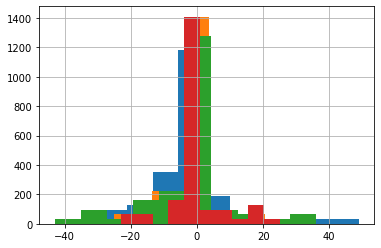

In [44]:
(gabon['Years_Farm_1'] - gabon['Years_Res_1']).hist()
(gabon['Years_Farm_2'] - gabon['Years_Res_2']).hist()
(gabon['Years_Farm_3'] - gabon['Years_Res_3']).hist()
(gabon['Years_Farm_4'] - gabon['Years_Res_4']).hist()

### iv. Primary Income | Secondary Income

Derived attributes: primary_farming_x, secondary_farming_x, primary_priv_tour_x, secondary_priv_tour_x

Options: Farming: 1, 1, 2, 1 | Tourism/Private: 3/5, 4, 3/tourism, 4

In [45]:
for col_a, col_b in ['primary_farming_', 'Primary_income_'], ['secondary_farming_', 'Secondary_income_']:
    for i in range(1,5):
        orkney[col_a+str(i)] = np.where(orkney[col_b+str(i)]==1, 1, 0)

for col_a, col_b in ['primary_farming_', 'HH_OCC1_'], ['secondary_farming_', 'HH_OCC2_']:
    for i in range(1,5):
        gabon[col_a+str(i)] = np.where(gabon[col_b+str(i)]==1, 1, 0)

for col_a, col_b in ['primary_farming_', 'Primary_income_'], ['secondary_farming_', 'Secondary_income_']:
    for i in range(1,5):
        tanzania[col_a+str(i)] = np.where(tanzania[col_b+str(i)]==2, 1, 0)

for col_a, col_b in ['primary_farming_', 'Primary_income_'], ['secondary_farming_', 'Secondary_income_']:
    for i in range(1,5):
        madken[col_a+str(i)] = np.where(madken[col_b+str(i)]==1, 1, 0)

In [46]:
for col_a, col_b in ['primary_priv_tour_', 'Primary_income_'], ['secondary_priv_tour_', 'Secondary_income_']:
    for i in range(1,5):
        orkney[col_a+str(i)] = np.where((orkney[col_b+str(i)]==3)|(orkney[col_b+str(i)]==5), 1, 0)

for col_a, col_b in ['primary_priv_tour_', 'HH_OCC1_'], ['secondary_priv_tour_', 'HH_OCC2_']:
    for i in range(1,5):
        gabon[col_a+str(i)] = np.where(gabon[col_b+str(i)]==4, 1, 0)

for col_a, col_b in ['primary_priv_tour_', 'Primary_income_'], ['secondary_priv_tour_', 'Secondary_income_']:
    for i in range(1,5):
        tanzania[col_a+str(i)] = np.where(tanzania[col_b+str(i)]==3, 1, 0)

for i in range(1,5):
    tanzania['secondary_priv_tour_'+str(i)] = np.where(tanzania['Tourism_income_'+str(i)]==1, 1, tanzania['secondary_priv_tour_'+str(i)])
        
for col_a, col_b in ['primary_priv_tour_', 'Primary_income_'], ['secondary_priv_tour_', 'Secondary_income_']:
    for i in range(1,5):
        madken[col_a+str(i)] = np.where(madken[col_b+str(i)]==4, 1, 0)

In [47]:
vietcamb.replace({'primary_farming_1': {"Yes":1, "No":0}}, inplace=True)
vietcamb.replace({'primary_farming_2': {"Yes":1, "No":0}}, inplace=True)
vietcamb.replace({'primary_farming_3': {"Yes":1, "No":0}}, inplace=True)
vietcamb.replace({'primary_farming_4': {"Yes":1, "No":0}}, inplace=True)

### v. Farm size | Livestock | Risk Punish | Trust govt/nationalpark/ngo | Trust community 3 (borrow/ lend)

In [48]:
# Check with Prof.

In [49]:
# Rename for creating Trust_govt and Trust_natpark

new_names = ['Trust_govt_1', 'Trust_govt_2', 'Trust_govt_3', 'Trust_govt_4',
             'Trust_natpark_1', 'Trust_natpark_2', 'Trust_natpark_3', 'Trust_natpark_4']

orig = ['Trust_SGRPID_1', 'Trust_SGRPID_2', 'Trust_SGRPID_3', 'Trust_SGRPID_4',
        'Trust_RSPB_1', 'Trust_RSPB_2', 'Trust_RSPB_3', 'Trust_RSPB_4']
orkney.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Min_Agriculture_1', 'Min_Agriculture_2', 'Min_Agriculture_3', 'Min_Agriculture_4',
        'ANPN_1', 'ANPN_2', 'ANPN_3', 'ANPN_4']
gabon.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Trust_MoA_1', 'Trust_MoA_2', 'Trust_MoA_3', 'Trust_MoA_4',
        'Trust_MV_KFS_1', 'Trust_MV_KFS_2', 'Trust_MV_KFS_3', 'Trust_MV_KFS_4',]
madken.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Trust_Tanzanian_government_1', 'Trust_Tanzanian_government_2', 'Trust_Tanzanian_government_3', 'Trust_Tanzanian_government_4',
        'Trust_TANAPA_1', 'Trust_TANAPA_2', 'Trust_TANAPA_3', 'Trust_TANAPA_4']
tanzania.rename(columns=dict(zip(orig, new_names)), inplace=True)

### vi. NegWellb | PosWellb | FutGen | Govt. Responsibility | Coordination | Risk Social | Trust community 1 | Trust Community 2 | Game depend on others | Game effect on others | Game next generation | Trust govt | Trust nationalpark

In [50]:
new_names = ['Neg_wellb_1', 'Neg_wellb_2', 'Neg_wellb_3', 'Neg_wellb_4', 'Pos_wellb_1', 'Pos_wellb_2', 'Pos_wellb_3', 'Pos_wellb_4',
             'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Gov_resp_1', 'Gov_resp_2', 'Gov_resp_3', 'Gov_resp_4',
             'Com_coord_1', 'Com_coord_2', 'Com_coord_3', 'Com_coord_4',
             'Risk_social_1', 'Risk_social_2', 'Risk_social_3', 'Risk_social_4', 'Risk_punish_1', 'Risk_punish_2', 'Risk_punish_3', 'Risk_punish_4',
             'Com_trust1_1', 'Com_trust1_2', 'Com_trust1_3', 'Com_trust1_4', 'Com_trust2_1', 'Com_trust2_2', 'Com_trust2_3', 'Com_trust2_4',
             'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
             'Effects_on_others_1', 'Effects_on_others_2', 'Effects_on_others_3', 'Effects_on_others_4',
             'Effects_on_next_gen_1', 'Effects_on_next_gen_2', 'Effects_on_next_gen_3', 'Effects_on_next_gen_4']

orig = ['Neg_Wellb_1', 'Neg_Wellb_2', 'Neg_Wellb_3', 'Neg_Wellb_4', 'Pos_Wellb_1', 'Pos_Wellb_2', 'Pos_Wellb_3', 'Pos_Wellb_4',
        'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Government_Responsibility_1', 'Government_Responsibility_2', 'Government_Responsibility_3', 'Government_Responsibility_4',
        'Coordination_scaring_1', 'Coordination_scaring_2', 'Coordination_scaring_3', 'Coordination_scaring_4',
        'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4', 'Risk_fine_1', 'Risk_fine_2', 'Risk_fine_3', 'Risk_fine_4',
        'Trust_community1_1', 'Trust_community1_2', 'Trust_community1_3', 'Trust_community1_4', 'Trust_community2_1', 'Trust_community2_2', 'Trust_community2_3', 'Trust_community2_4',
        'Game_depend_on_others_1', 'Game_depend_on_others_2', 'Game_depend_on_others_3', 'Game_depend_on_others_4',
        'Game_effect_on_others_1', 'Game_effect_on_others_2', 'Game_effect_on_others_3', 'Game_effect_on_others_4',
        'Game_next_gen_1', 'Game_next_gen_2', 'Game_next_gen_3', 'Game_next_gen_4']
orkney.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Neg_Wellb_1', 'Neg_Wellb_2', 'Neg_Wellb_3', 'Neg_Wellb_4', 'Pos_Wellb_1', 'Pos_Wellb_2', 'Pos_Wellb_3', 'Pos_Wellb_4',
        'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'ANPN_resp_1', 'ANPN_resp_2', 'ANPN_resp_3', 'ANPN_resp_4',
        'Com_Coop_1', 'Com_Coop_2', 'Com_Coop_3', 'Com_Coop_4',
        'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4', 'Prison_1', 'Prison_2', 'Prison_3', 'Prison_4',
        'Community_Trust1_1', 'Community_Trust1_2', 'Community_Trust1_3', 'Community_Trust1_4', 'Community_Trust2_1', 'Community_Trust2_2', 'Community_Trust2_3', 'Community_Trust2_4',
        'Games_Depend_Others_1', 'Games_Depend_Others_2', 'Games_Depend_Others_3', 'Games_Depend_Others_4',
        'Games_Effects_Others_1', 'Games_Effects_Others_2', 'Games_Effects_Others_3', 'Games_Effects_Others_4',
        'Games_Fut_gen_1', 'Games_Fut_gen_2', 'Games_Fut_gen_3', 'Games_Fut_gen_4']
gabon.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Lions_harm_1', 'Lions_harm_2', 'Lions_harm_3', 'Lions_harm_4', 'Lions_benefit_1', 'Lions_benefit_2', 'Lions_benefit_3', 'Lions_benefit_4',
        'Conservation_futuregen_1', 'Conservation_futuregen_2', 'Conservation_futuregen_3', 'Conservation_futuregen_4', 'Government_compensate_1', 'Government_compensate_2', 'Government_compensate_3', 'Government_compensate_4',
        'Coordinate_scaring_1', 'Coordinate_scaring_2', 'Coordinate_scaring_3', 'Coordinate_scaring_4', 
        'Prevent_social_1', 'Prevent_social_2', 'Prevent_social_3', 'Prevent_social_4', 'Prevent_punished_1', 'Prevent_punished_2', 'Prevent_punished_3', 'Prevent_punished_4',
        'Community_help_1', 'Community_help_2', 'Community_help_3', 'Community_help_4', 'Community_honest_1', 'Community_honest_2', 'Community_honest_3', 'Community_honest_4',
        'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
        'Effect_on_others_1', 'Effect_on_others_2', 'Effect_on_others_3', 'Effect_on_others_4',
        'Effect_on_future_1', 'Effect_on_future_2', 'Effect_on_future_3', 'Effect_on_future_4']
tanzania.rename(columns=dict(zip(orig, new_names)), inplace=True)

orig = ['Neg_wellb_1', 'Neg_wellb_2', 'Neg_wellb_3', 'Neg_wellb_4', 'Pos_wellb_1', 'Pos_wellb_2', 'Pos_wellb_3', 'Pos_wellb_4',
        'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Gov_resp_1', 'Gov_resp_2', 'Gov_resp_3', 'Gov_resp_4',
        'Com_coord_1', 'Com_coord_2', 'Com_coord_3', 'Com_coord_4',
        'Social_norms_1', 'Social_norms_2', 'Social_norms_3', 'Social_norms_4', 'Risks_fines_1', 'Risks_fines_2', 'Risks_fines_3', 'Risks_fines_4',
        'Com_trust1_1', 'Com_trust1_2', 'Com_trust1_3', 'Com_trust1_4', 'Com_trust2_1', 'Com_trust2_2', 'Com_trust2_3', 'Com_trust2_4',
        'Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
        'Effects_on_others_1', 'Effects_on_others_2', 'Effects_on_others_3', 'Effects_on_others_4',
        'Effects_on_next_gen_1', 'Effects_on_next_gen_2', 'Effects_on_next_gen_3', 'Effects_on_next_gen_4']
madken.rename(columns=dict(zip(orig, new_names)), inplace=True)

In [51]:
col_list = ['Neg_wellb_1', 'Neg_wellb_2', 'Neg_wellb_3', 'Neg_wellb_4', 'Pos_wellb_1', 'Pos_wellb_2', 'Pos_wellb_3', 'Pos_wellb_4',
             'Fut_Gen_1', 'Fut_Gen_2', 'Fut_Gen_3', 'Fut_Gen_4', 'Gov_resp_1', 'Gov_resp_2', 'Gov_resp_3', 'Gov_resp_4',
             'Com_coord_1', 'Com_coord_2', 'Com_coord_3', 'Com_coord_4',
             'Risk_social_1', 'Risk_social_2', 'Risk_social_3', 'Risk_social_4', 'Risk_punish_1', 'Risk_punish_2', 'Risk_punish_3', 'Risk_punish_4',
             'Com_trust1_1', 'Com_trust1_2', 'Com_trust1_3', 'Com_trust1_4', 'Com_trust2_1', 'Com_trust2_2', 'Com_trust2_3', 'Com_trust2_4',
             'Trust_govt_1', 'Trust_govt_2', 'Trust_govt_3', 'Trust_govt_4',
             'Trust_natpark_1', 'Trust_natpark_2', 'Trust_natpark_3', 'Trust_natpark_4']

col_list_exceptions = ['Depend_on_others_1', 'Depend_on_others_2', 'Depend_on_others_3', 'Depend_on_others_4',
                       'Effects_on_others_1', 'Effects_on_others_2', 'Effects_on_others_3', 'Effects_on_others_4',
                       'Effects_on_next_gen_1', 'Effects_on_next_gen_2', 'Effects_on_next_gen_3', 'Effects_on_next_gen_4']

for col in col_list:
    #orkney.drop(orkney[(orkney[col]==0)].index, inplace=True)
    orkney.replace({col: {-2:0, -1:0.25, 0:0.5, 1:0.75, 2:1}}, inplace=True)
    #gabon.drop(gabon[(gabon[col]==0)].index, inplace=True)
    gabon.replace({col: {-2:0, -1:0.25, 0:0.5, 1:0.75, 2:1}}, inplace=True)
    #tanzania.drop(tanzania[(tanzania[col]==0)].index, inplace=True)
    tanzania.replace({col: {-2:0, -1:0.25, 0:0.5, 1:0.75, 2:1}}, inplace=True)    
    #madken.drop(madken[(madken[col]==-98)].index, inplace=True)
    #madken.drop(madken[(madken[col]==-99)].index, inplace=True)
    madken.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)

for col in col_list_exceptions:
    #orkney.drop(orkney[(orkney[col]==0)].index, inplace=True)
    orkney.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)
    #gabon.drop(gabon[(gabon[col]==0)].index, inplace=True)
    gabon.replace({col: {-2:0, -1:0.25, 0:0.5, 1:0.75, 2:1}}, inplace=True)
    #tanzania.drop(tanzania[(tanzania[col]==0)].index, inplace=True)
    tanzania.replace({col: {-2:0, -1:0.25, 0:0.5, 1:0.75, 2:1}}, inplace=True)    
    #madken.drop(madken[(madken[col]==-98)].index, inplace=True)
    #madken.drop(madken[(madken[col]==-99)].index, inplace=True)
    madken.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)

In [52]:
for col in col_list+col_list_exceptions:
    print(col, orkney[col].min(), orkney[col].max())
    print(col, gabon[col].min(), gabon[col].max())
    print(col, tanzania[col].min(), tanzania[col].max())
    print(col, madken[col].min(), madken[col].max())

Neg_wellb_1 0.25 1.0
Neg_wellb_1 0.0 1.0
Neg_wellb_1 0.0 1.0
Neg_wellb_1 0.0 1.0
Neg_wellb_2 0.0 1.0
Neg_wellb_2 0.0 1.0
Neg_wellb_2 0.0 1.0
Neg_wellb_2 -98.0 1.0
Neg_wellb_3 0.0 1.0
Neg_wellb_3 0.0 1.0
Neg_wellb_3 0.0 1.0
Neg_wellb_3 -98.0 1.0
Neg_wellb_4 0.0 1.0
Neg_wellb_4 0.0 1.0
Neg_wellb_4 0.0 1.0
Neg_wellb_4 0.0 1.0
Pos_wellb_1 0.0 0.25
Pos_wellb_1 0.0 1.0
Pos_wellb_1 0.0 1.0
Pos_wellb_1 0.0 1.0
Pos_wellb_2 0.0 0.25
Pos_wellb_2 0.0 1.0
Pos_wellb_2 0.0 1.0
Pos_wellb_2 -98.0 1.0
Pos_wellb_3 0.0 0.25
Pos_wellb_3 0.0 1.0
Pos_wellb_3 0.0 1.0
Pos_wellb_3 -98.0 1.0
Pos_wellb_4 0.0 1.0
Pos_wellb_4 0.0 1.0
Pos_wellb_4 0.0 1.0
Pos_wellb_4 0.0 1.0
Fut_Gen_1 0.0 1.0
Fut_Gen_1 0.0 1.0
Fut_Gen_1 0.0 1.0
Fut_Gen_1 -98.0 1.0
Fut_Gen_2 0.0 1.0
Fut_Gen_2 0.0 1.0
Fut_Gen_2 0.0 1.0
Fut_Gen_2 -98.0 1.0
Fut_Gen_3 0.0 1.0
Fut_Gen_3 0.0 1.0
Fut_Gen_3 0.0 1.0
Fut_Gen_3 -98.0 1.0
Fut_Gen_4 0.0 1.0
Fut_Gen_4 0.0 1.0
Fut_Gen_4 0.0 1.0
Fut_Gen_4 -98.0 1.0
Gov_resp_1 0.0 1.0
Gov_resp_1 0.0 1.0
Gov_resp_1 0.0

### vii. Relationship rating | Goal in games | Country

In [53]:
# get one-hot encoding of column, join the encoded frame with original dataframe
for i, col in enumerate(['Goal_games_1', 'Goal_games_2', 'Goal_games_3', 'Goal_games_4']):
    one_hot = pd.get_dummies(orkney[col].astype(float), prefix='Game_goal_'+str(i+1), dummy_na=False)
    one_hot.rename(columns = lambda x : str(x)[:-2], inplace=True)
    orkney = orkney.join(one_hot)

for i, col in enumerate(['Games_Obj_1', 'Games_Obj_2', 'Games_Obj_3', 'Games_Obj_4']):
    one_hot = pd.get_dummies(gabon[col].astype(float), prefix='Game_goal_'+str(i+1), dummy_na=False)
    one_hot.rename(columns = lambda x : str(x)[:-2], inplace=True)
    gabon = gabon.join(one_hot)

for i, col in enumerate(['Game_obj_1', 'Game_obj_2', 'Game_obj_3', 'Game_obj_4']):
    one_hot = pd.get_dummies(tanzania[col].astype(float), prefix='Game_goal_'+str(i+1), dummy_na=False)
    one_hot.rename(columns = lambda x : str(x)[:-2], inplace=True)
    tanzania = tanzania.join(one_hot)

for i, col in enumerate(['Goal_1', 'Goal_2', 'Goal_3', 'Goal_4']):
    one_hot = pd.get_dummies(madken[col].astype(float), prefix='Game_goal_'+str(i+1), dummy_na=False)
    one_hot.rename(columns = lambda x : str(x)[:-2], inplace=True)
    madken = madken.join(one_hot)
    
# drop the encodings for 'other' in goal
for i in range(1,5):
    col = 'Game_goal_'+str(i)+'_5'
    if col in orkney.columns:
        orkney.drop(col, axis=1, inplace=True)
    if col in gabon.columns:
        gabon.drop(col, axis=1, inplace=True)
    if col in tanzania.columns:
        tanzania.drop(col, axis=1, inplace=True)
    if col in madken.columns:
        madken.drop(col, axis=1, inplace=True)

# add column for missing encoding:
for prefix in ['Game_goal_1_', 'Game_goal_2_', 'Game_goal_3_', 'Game_goal_4_']:
    for suffix in range(1,5):
        if prefix+str(suffix) not in orkney.columns:
            orkney[prefix+str(suffix)] = 0
        if prefix+str(suffix) not in gabon.columns:
            gabon[prefix+str(suffix)] = 0
        if prefix+str(suffix) not in tanzania.columns:
            tanzania[prefix+str(suffix)] = 0
        if prefix+str(suffix) not in madken.columns:
            madken[prefix+str(suffix)] = 0

In [54]:
new_names = ['Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4', 'Rel2_1', 'Rel2_2', 'Rel2_3', 'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4']
orig = ['Familiarity_1_1', 'Familiarity_1_2', 'Familiarity_1_3', 'Familiarity_1_4', 'Familiarity_2_1', 'Familiarity_2_2', 'Familiarity_2_3', 'Familiarity_2_4', 'Familiarity_3_1', 'Familiarity_3_2', 'Familiarity_3_3', 'Familiarity_3_4']
tanzania.rename(columns=dict(zip(orig, new_names)), inplace=True)
orig = ['familiarity.familiarity_001_1', 'familiarity.familiarity_001_2', 'familiarity.familiarity_001_3', 'familiarity.familiarity_001_4', 'familiarity.familiarity_002_1', 'familiarity.familiarity_002_2', 'familiarity.familiarity_002_3', 'familiarity.familiarity_002_4', 'familiarity.familiarity_003_1', 'familiarity.familiarity_003_2', 'familiarity.familiarity_003_3', 'familiarity.familiarity_003_4']
madken.rename(columns=dict(zip(orig, new_names)), inplace=True)

In [55]:
for col in new_names:
    orkney.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)
    gabon.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)
    tanzania.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)
    madken.replace({col: {1:0, 2:0.33, 3:0.66, 4:1}}, inplace=True)

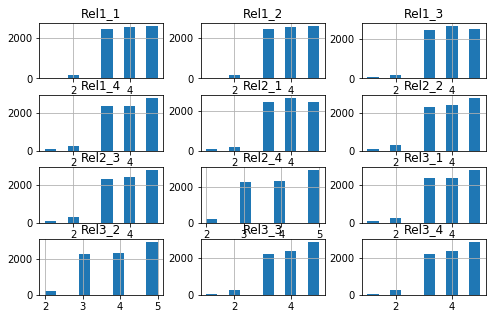

In [56]:
vietcamb[['Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4', 'Rel2_1', 'Rel2_2', 'Rel2_3',
       'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4']].hist(figsize=(8,5))
print()

In [57]:
for col in ['Rel1_1', 'Rel1_2', 'Rel1_3', 'Rel1_4', 'Rel2_1', 'Rel2_2', 'Rel2_3', 'Rel2_4', 'Rel3_1', 'Rel3_2', 'Rel3_3', 'Rel3_4']:
    vietcamb.replace({col: {1:0, 2:0.25, 3:0.5, 4:0.75, 5:1}}, inplace=True)

# Combine Datasets

In [58]:
print(len(orkney))
print(len(gabon))
print(len(tanzania))
print(len(madken))
print(len(vietcamb))
print(len(madgas))

672
2080
1376
5115
7840
640


#### Combine orkney, gabon, tanzania, madagascar/kenya

In [59]:
common_columns = set(orkney.columns).intersection(set(gabon.columns)).intersection(set(tanzania.columns)).intersection(set(madken.columns))
print(len(common_columns))
common_columns

124


{'Age_1',
 'Age_2',
 'Age_3',
 'Age_4',
 'Com_coord_1',
 'Com_coord_2',
 'Com_coord_3',
 'Com_coord_4',
 'Com_trust1_1',
 'Com_trust1_2',
 'Com_trust1_3',
 'Com_trust1_4',
 'Com_trust2_1',
 'Com_trust2_2',
 'Com_trust2_3',
 'Com_trust2_4',
 'Depend_on_others_1',
 'Depend_on_others_2',
 'Depend_on_others_3',
 'Depend_on_others_4',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Effects_on_next_gen_1',
 'Effects_on_next_gen_2',
 'Effects_on_next_gen_3',
 'Effects_on_next_gen_4',
 'Effects_on_others_1',
 'Effects_on_others_2',
 'Effects_on_others_3',
 'Effects_on_others_4',
 'Fut_Gen_1',
 'Fut_Gen_2',
 'Fut_Gen_3',
 'Fut_Gen_4',
 'GameID',
 'Game_goal_1_1',
 'Game_goal_1_2',
 'Game_goal_1_3',
 'Game_goal_1_4',
 'Game_goal_2_1',
 'Game_goal_2_2',
 'Game_goal_2_3',
 'Game_goal_2_4',
 'Game_goal_3_1',
 'Game_goal_3_2',
 'Game_goal_3_3',
 'Game_goal_3_4',
 'Game_goal_4_1',
 'Game_goal_4_2',
 'Game_goal_4_3',
 'Game_goal_4_4',
 'Gender_1',
 'Gender_2',
 'Gender_3',
 'Gender_4

In [60]:
# save the combined dataset (4)
pd.concat([orkney[common_columns], gabon[common_columns], tanzania[common_columns], madken[common_columns]], axis=0, ignore_index=True).to_csv('combined4.csv')

#### Combine orkney, gabon, tanzania, madagascar/kenya, vietnam, cambodia

In [61]:
common_columns = set(orkney.columns).intersection(set(gabon.columns)).intersection(set(tanzania.columns)).intersection(set(madken.columns)).intersection(set(vietcamb.columns))
print(len(common_columns))
common_columns

40


{'Age_1',
 'Age_2',
 'Age_3',
 'Age_4',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'GameID',
 'Gender_1',
 'Gender_2',
 'Gender_3',
 'Gender_4',
 'Rel1_1',
 'Rel1_2',
 'Rel1_3',
 'Rel1_4',
 'Rel2_1',
 'Rel2_2',
 'Rel2_3',
 'Rel2_4',
 'Rel3_1',
 'Rel3_2',
 'Rel3_3',
 'Rel3_4',
 'RespHOH_1',
 'RespHOH_2',
 'RespHOH_3',
 'RespHOH_4',
 'Rounds',
 'Treatments',
 'country',
 'env',
 'envProduction',
 'primary_farming_1',
 'primary_farming_2',
 'primary_farming_3',
 'primary_farming_4',
 'production',
 'subsidy'}

In [62]:
# save the combined dataset (6)
pd.concat([orkney[common_columns], gabon[common_columns], tanzania[common_columns], madken[common_columns], vietcamb[common_columns]], axis=0, ignore_index=True).to_csv('combined6.csv')

#### Combine orkney, gabon, tanzania, madagascar/kenya, vietnam, cambodia, madagascar

In [63]:
common_columns = set(orkney.columns).intersection(set(gabon.columns)).intersection(set(tanzania.columns)).intersection(set(madken.columns)).intersection(set(vietcamb.columns)).intersection(set(madgas.columns))
print(len(common_columns))
common_columns

18


{'Age_1',
 'Age_2',
 'Age_3',
 'Age_4',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'GameID',
 'Gender_1',
 'Gender_2',
 'Gender_3',
 'Gender_4',
 'Rounds',
 'Treatments',
 'country',
 'envProduction',
 'subsidy'}

In [64]:
# save the combined dataset (7)
pd.concat([orkney[common_columns], gabon[common_columns], tanzania[common_columns], madken[common_columns], vietcamb[common_columns], madgas[common_columns]], axis=0, ignore_index=True).to_csv('combined7.csv')